In [1]:
import pandas
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!tail -n 14 ../data/adult.names | awk -F: '{print "\x22"$1"\x22,"}'

"age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",


In [9]:
colnames = ["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"income"]

In [11]:
df = pandas.read_csv("../data/adult.data.gz", names=colnames)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
df['target'] = df['income'] == " >50K"

In [28]:
colors = ['r' if t else 'b' for t in df['target']]

In [30]:
df['target'] = (df['target']* 2 / 2)

<AxesSubplot:xlabel='age', ylabel='education-num'>

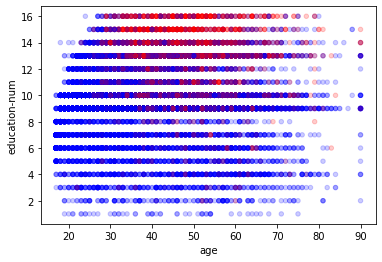

In [33]:
df.plot.scatter('age', 'education-num', c=colors, alpha=0.2)

In [35]:
def read_data(sample_size=None):
    colnames = ["age",
            "workclass",
            "fnlwgt",
            "education",
            "education-num",
            "marital-status",
            "occupation",
            "relationship",
            "race",
            "sex",
            "capital-gain",
            "capital-loss",
            "hours-per-week",
            "native-country",
            "income"]
    df = pandas.read_csv("../data/adult.data.gz", names=colnames)
    if sample_size:
        df = df.sample(sample_size)
        df.index = range(sample_size)
    target = (df['income'] == " >50K") * 1
    return df[colnames[:-1]], target

In [36]:
features, target = read_data(5000)

In [38]:
features[['age', 'education-num']].iloc[42]

age              81
education-num    13
Name: 42, dtype: int64

In [39]:
features[['age', 'education-num']].iloc[43]

age              37
education-num     9
Name: 43, dtype: int64

In [42]:
sum((features[['age', 'education-num']].iloc[42] - features[['age', 'education-num']].iloc[43])**2)

1952

In [43]:
from sklearn.neighbors import DistanceMetric

In [44]:
DistanceMetric.get_metric("wminkowski", w=[3, 1], p=2)

In [45]:
DistanceMetric.get_metric("wminkowski", w=[3, 1], p=2).pairwise(features[['age', 'education-num']].iloc[:3])

array([[ 0.        , 30.2654919 , 84.02380615],
       [30.2654919 ,  0.        , 54.03702434],
       [84.02380615, 54.03702434,  0.        ]])

In [46]:
features[['age', 'education-num']].iloc[:3]

,age,education-num
0,54,9
1,44,13
2,26,11


In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
features['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [57]:
encoder = OneHotEncoder(sparse=False, drop='first').fit(features[['sex']])

In [58]:
encoder.transform(features[['sex']])[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [60]:
pandas.get_dummies(features[['sex']], drop_first=True)

,sex_ Male
0,1
1,0
2,0
3,1
4,1
...,...
4995,1
4996,0
4997,1
4998,0


In [61]:
def transform_features(features):
    cat_columns = ['sex', 'education', 'race']
    cont_columns = ['age', 'education-num']
    return pandas.get_dummies(features[cat_columns + cont_columns],
                             columns = cat_columns, drop_first=True)

In [62]:
transfromed_features = transform_features(features)

In [63]:
transfromed_features

,age,education-num,sex_ Male,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,...,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,54,9,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,44,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,9,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,27,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4996,36,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4997,43,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4998,55,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
